In [ ]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=9833c7534b51946ea47967196ec507774d796ff6d3b5e3c9b686de752feb3ebf
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
!chmod 600 /content/drive/MyDrive/kaggle.json

In [ ]:
!pip install docx2txt pandas

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=bc9b82ace813aa139db4043e70597f74183b87043120b38083ca75bcc6107191
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable toc2/main

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 74.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428768 sha256=dd23131b1f320d870ab7bf2e8f9cb3759d032049234de4ffea5314e93d56b3d3
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17475 sha256=81aa03f4de87c0962d3e81a8b5916ad9458372683a49b6aeeebe83f8f4cb8555
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core


### Packages

In [ ]:
import pandas as pd
import docx2txt
from io import StringIO
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns
import random
import kagglehub
import requests
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px

In [ ]:
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")
print('Path ',path)

Path  /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23


In [ ]:
pitStops = path + '/pit_stops.csv'
fPS = pd.read_csv(pitStops)
fPS.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
races = path + '/races.csv'
fR = pd.read_csv(races)
fR.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
f0 = fR.merge(fPS, on='raceId', how='right')
f0.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time_x', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverId',
       'stop', 'lap', 'time_y', 'duration', 'milliseconds'],
      dtype='object')

### Helper functions

In [ ]:
def pCA(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :n_components]
    X_pca = np.dot(X_centered, eigenvectors)

    return X_pca, eigenvalues, eigenvectors

def euclideanDistance(a, b):
  return np.sqrt(np.sum((a - b)**2))

def arrayDistances(data):
  distances = set()
  for i in range(len(data)):
    for j in range(i+1, len(data)):
      distance = euclideanDistance(data[i], data[j])
      distances.add(distance)
  return [np.array(distance) for distance in distances]

def calculateIQR(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  return iqr

def removeOutliers(data):
  outliersSet = set()
  distances = arrayDistances(data)
  q1, q3 = np.percentile(distances, [25, 75])
  iqr = q3 - q1
  lowerBound = q1 - 1.5 * iqr
  upperBound = q3 + 1.5 * iqr
  for i in range(len(data)):
    for j in range(i+1, len(data)):
      distance = euclideanDistance(data[i], data[j])
      if distance < lowerBound or distance > upperBound:
        outliersSet.add(tuple(data[i]))
        outliersSet.add(tuple(data[j]))
  return outliersSet

def computeSilhouetteScore(df, method):
  for column in df.columns:
    if 'clusters' in column:
      labels = df[column]
      if all(col in df.columns for col in ['X (Seconds)', 'Y (Hours)', 'Z (Minutes)']):
        data = df[['X (Seconds)', 'Y (Hours)', 'Z (Minutes)']].values
        score = silhouette_score(data, labels, random_state=33)
        experiments.append(f'{df.name}_{column}')
        scores.append(score)

def selectRandomVectors(data, k):
  selectedVectors = []
  selectedIndices = set()
  while len(selectedVectors) < k:
      randomIndex = random.randint(0, len(data) - 1)
      if randomIndex not in selectedIndices:
        selectedVectors.append(data[randomIndex])
        selectedIndices.add(randomIndex)
  return selectedVectors

### Preprocessing and Visualization

#### F1 dataset

In [ ]:
f0.dtypes

,0
raceId,int64
year,int64
round,int64
circuitId,int64
name,object
date,object
time_x,object
url,object
fp1_date,object
fp1_time,object


In [ ]:
for column in f0.columns:
  if f0[column].dtype != 'int64':
    f0.drop(column, axis=1, inplace=True)

In [ ]:
f0.shape

(10990, 8)

##### Reducing it to 3 dimensions using PCA

In [ ]:
f0 = f0.to_numpy()
f0Reduced = pca(f0, 3)[0]

In [ ]:
f0Reduced.shape

(10990, 3)

In [ ]:
np.random.seed(33)
f0Reduced = selectRandomVectors(f0Reduced, 500)

In [ ]:
f0Reduced = np.asarray(f0Reduced)
f0Reduced.shape

(500, 3)

In [ ]:
fdf = pd.DataFrame(f0Reduced, columns=['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'])
fdf.head()

,X (Seconds),Y (Hours),Z (Minutes)
0,-63058.349587,534.243629,-23.547376
1,-55061.284251,-310.630517,-40.309628
2,-61818.279644,-326.810117,-120.345271
3,-59183.283530,-315.067706,-52.656124
4,-61667.282365,-322.702007,-67.598182


In [ ]:
fdf.to_csv('/content/drive/MyDrive/dm634/fdf.csv',index=True)

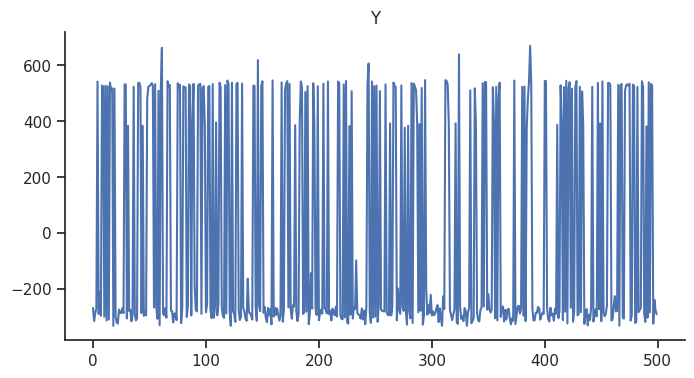

In [ ]:
# @title Y

from matplotlib import pyplot as plt
fdf['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

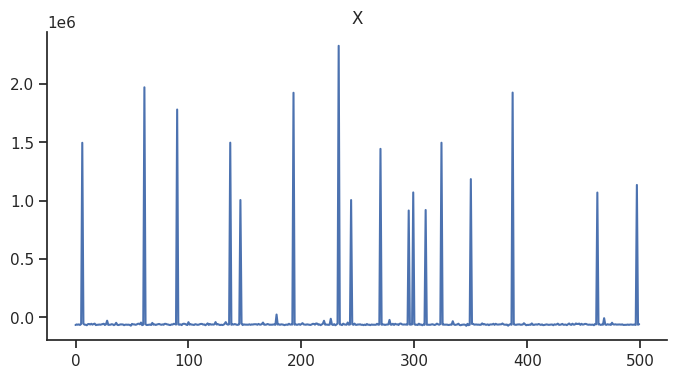

In [ ]:
# @title X

from matplotlib import pyplot as plt
fdf['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

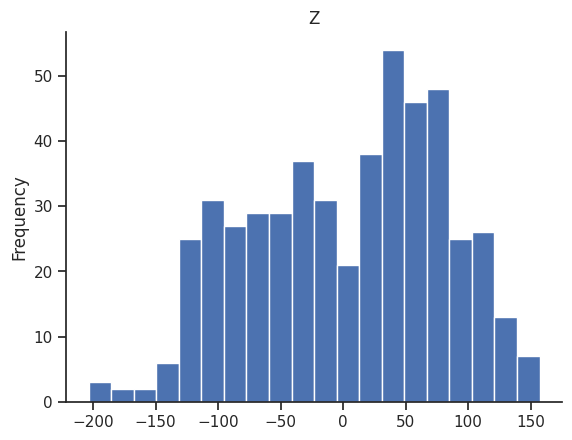

In [ ]:
# @title Z

from matplotlib import pyplot as plt
fdf['Z'].plot(kind='hist', bins=20, title='Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

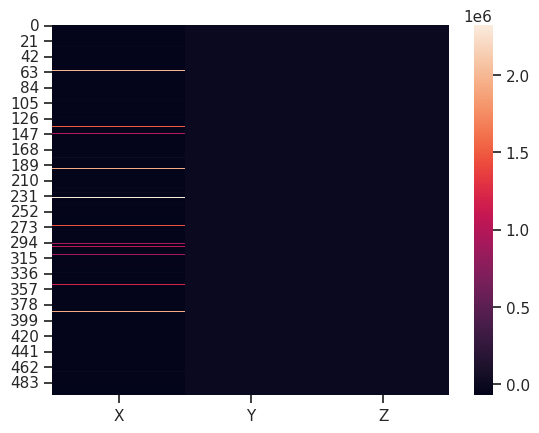

In [ ]:
sns.set_theme(style="ticks")
sns.heatmap(fdf)

#### Generated using Grok

[Drive Link](https://docs.google.com/document/d/12SSEGjrgWfi8idD0ZbmEySu2y5dir5_P/edit?usp=drive_link&ouid=112379317695011195689&rtpof=true&sd=true) for the data generated using Grok by X.

In [ ]:
genData = docx2txt.process('/content/drive/MyDrive/dm634/generatedUsingGrok.docx')
print(type(genData))
print(genData[:50])

df = pd.read_csv(StringIO(genData),sep=',')
print(df.head())
print(df.shape)

<class 'str'>
X (Seconds),Y (Hours),Z (Minutes)

0,0,0

10,0,20

   X (Seconds)  Y (Hours)  Z (Minutes)
0            0          0            0
1           10          0           20
2           15          1           30
3           20          2           15
4           30          3           45
(539, 3)


In [ ]:
df.to_csv('/content/drive/MyDrive/dm634/generatedUsingGrok.csv',index=False)


In [ ]:
df.head()

,X (Seconds),Y (Hours),Z (Minutes)
0,0,0,0
1,10,0,20
2,15,1,30
3,20,2,15
4,30,3,45


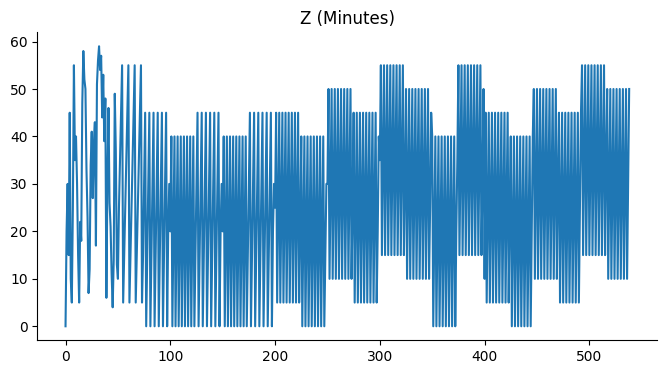

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df['Z (Minutes)'].plot(kind='line', figsize=(8, 4), title='Z (Minutes)')
plt.gca().spines[['top', 'right']].set_visible(False)

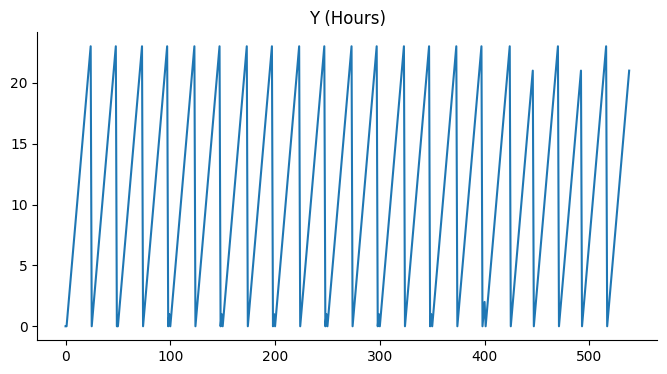

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df['Y (Hours)'].plot(kind='line', figsize=(8, 4), title='Y (Hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

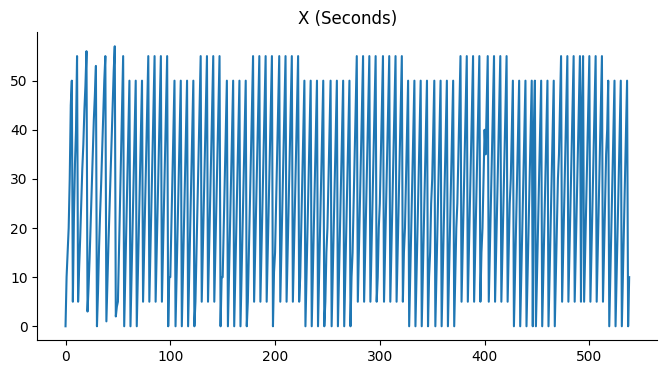

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df['X (Seconds)'].plot(kind='line', figsize=(8, 4), title='X (Seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

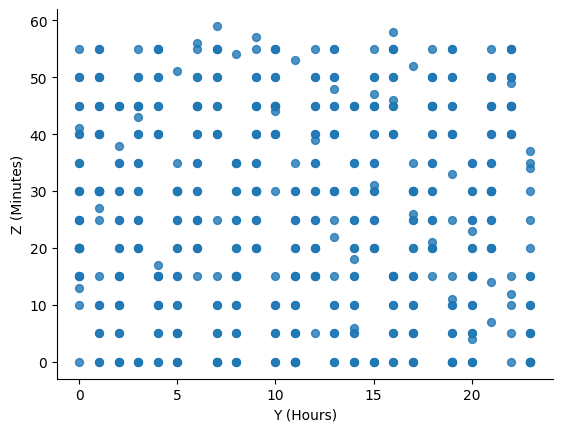

In [ ]:
# @title Y (Hours) vs Z (Minutes)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Y (Hours)', y='Z (Minutes)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

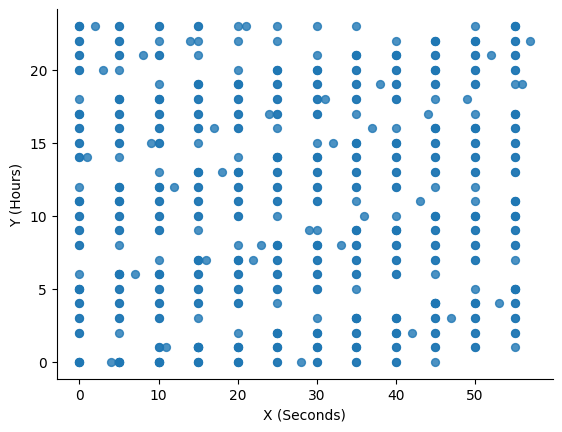

In [ ]:
# @title X (Seconds) vs Y (Hours)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='X (Seconds)', y='Y (Hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

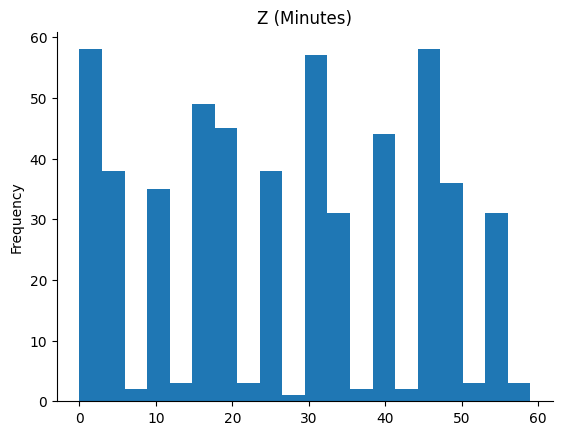

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df['Z (Minutes)'].plot(kind='hist', bins=20, title='Z (Minutes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

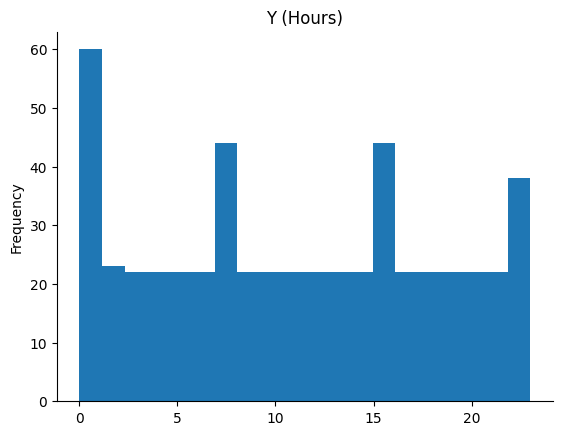

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df['Y (Hours)'].plot(kind='hist', bins=20, title='Y (Hours)')
plt.gca().spines[['top', 'right',]].set_visible(False)

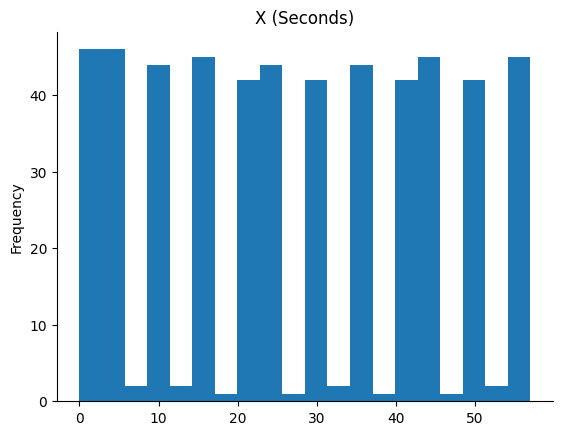

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df['X (Seconds)'].plot(kind='hist', bins=20, title='X (Seconds)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

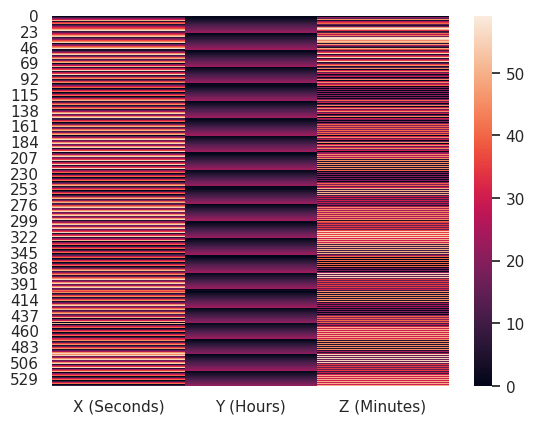

In [ ]:
sns.set_theme(style="whitegrid")
sns.heatmap(df)

In [ ]:
fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True), contours_x=dict(show=True, usecolormap=True,
                                  highlightcolor="pink", project_x=True), )
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(y=2.87,z=-0.64,x=-1),
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

#### Second dataset

In [ ]:
df2 = df.copy()
df2['Z (Minutes)'] = df2['Y (Hours)']*60 + df2['X (Seconds)']/60

df2.to_csv('/content/drive/MyDrive/dm634/generatedUsingGrok2.csv',index=True)


In [ ]:


fig = go.Figure(data=[go.Surface(z=df2.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen",project_z=True))
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(y=2.87,z=-0.64,x=1),
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
df2.head()

,X (Seconds),Y (Hours),Z (Minutes)
0,0,0,0.000000
1,10,0,0.166667
2,15,1,60.250000
3,20,2,120.333333
4,30,3,180.500000


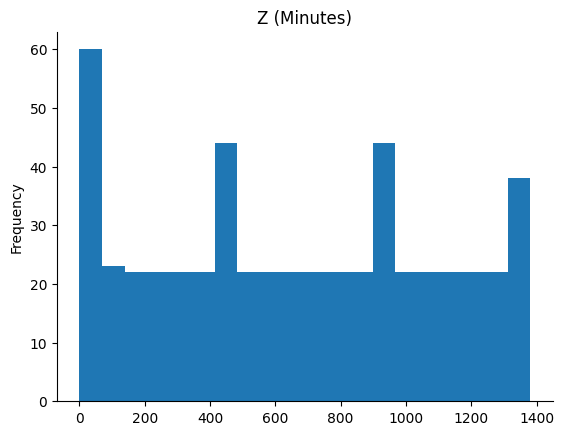

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df2['Z (Minutes)'].plot(kind='hist', bins=20, title='Z (Minutes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

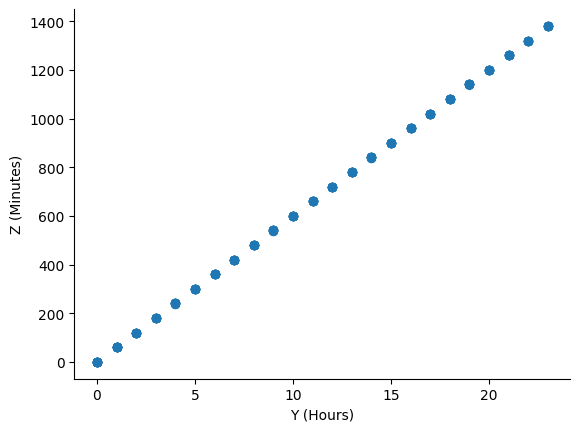

In [ ]:
# @title Y (Hours) vs Z (Minutes)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Y (Hours)', y='Z (Minutes)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

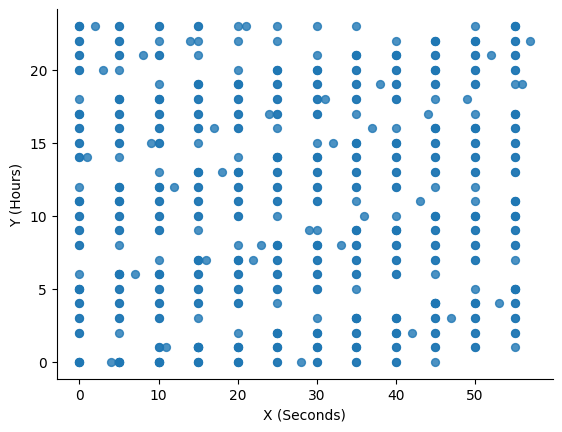

In [ ]:
# @title X (Seconds) vs Y (Hours)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='X (Seconds)', y='Y (Hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

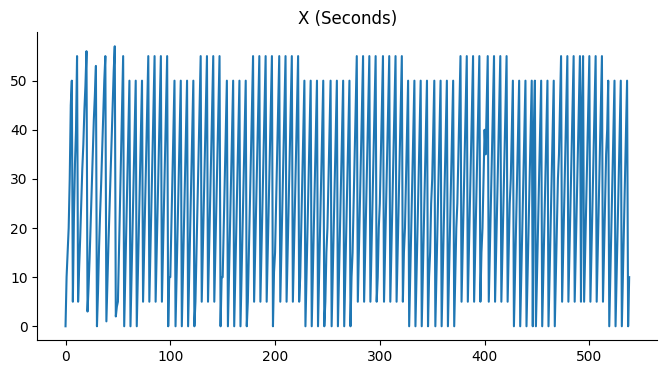

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df2['X (Seconds)'].plot(kind='line', figsize=(8, 4), title='X (Seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

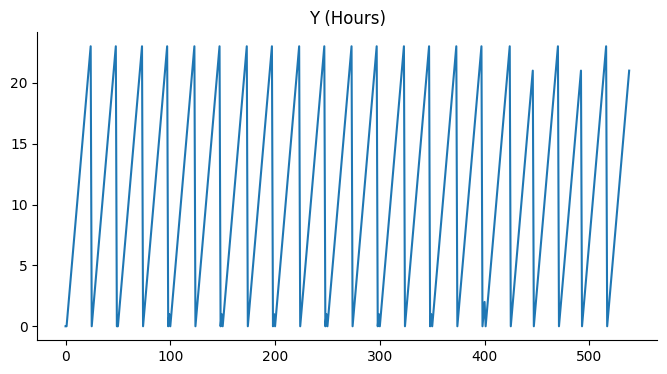

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df2['Y (Hours)'].plot(kind='line', figsize=(8, 4), title='Y (Hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

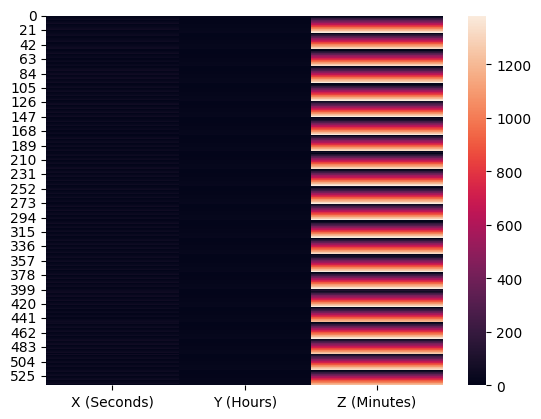

In [ ]:
sns.heatmap(df2)

In [ ]:
x = df['X (Seconds)'].to_list()
y = df['Y (Hours)'].to_list()
z = df['Z (Minutes)'].to_list()
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50,)], layout=go.Layout(scene=dict(xaxis_title='X (Seconds)', yaxis_title='Y (Hours)', zaxis_title='Z (Minutes)')))
fig.show()

### Removing outliers using Euclidean Distances

In [ ]:
df.describe()

,X (Seconds),Y (Hours),Z (Minutes)
count,539.000000,539.000000,539.000000
mean,27.298701,11.031540,26.773655
std,17.390171,7.019154,17.203591
min,0.000000,0.000000,0.000000
25%,10.000000,5.000000,13.500000
50%,25.000000,11.000000,25.000000
75%,42.500000,17.000000,40.000000
max,57.000000,23.000000,59.000000


#### Dataset 1

In [ ]:
dataArray = df.to_numpy()
distances = arrayDistances(dataArray)
fig = go.Figure(data=[go.Box(x=distances)])
fig.show()

In [ ]:
print(calculateIQR(distances))

24.556671441748193


In [ ]:
outliers = removeOutliers(dataArray)
print(len(outliers))

0


#### Dataset 2

In [ ]:
dataArray = df2.to_numpy()
distances = arrayDistances(dataArray)
fig = go.Figure(data=[go.Box(x=distances)])
fig.show()

In [ ]:
print(calculateIQR(distances))

600.6010023387444


In [ ]:
outliers = removeOutliers(dataArray)
print(len(outliers))

0


There are no outliers in the generated datasets.

#### Dataset 3

In [ ]:
dataArray = fdf.to_numpy()
distances = arrayDistances(dataArray)
fig = go.Figure(data=[go.Box(x=distances)])
fig.show()

In [ ]:
print(calculateIQR(distances))

5760.0896292870675


In [ ]:
outliers = removeOutliers(dataArray)
print(len(outliers))

500


Lowkey, no outliers. hehe

### Create copies

In [ ]:
dfKmeans = df.copy()
df2Kmeans = df2.copy()
fdfKmeans = fdf.copy()

dataframesForKmeans = [dfKmeans, df2Kmeans, fdfKmeans]

for dataframe in dataframesForKmeans:
  print(dataframe.columns)

Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')
Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')
Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')


In [ ]:
dfAgglomerative = df.copy()
df2Agglomerative = df2.copy()
fdfAgglomerative = fdf.copy()

dataframesForAgglomerative = [dfAgglomerative, df2Agglomerative, fdfAgglomerative]

for dataframe in dataframesForAgglomerative:
  print(dataframe.columns)

Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')
Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')
Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)'], dtype='object')


### K means Clustering

In [ ]:
def kmeans(data, k, max_iterations=100):
  random.seed(33)
  centroids = selectRandomVectors(data,k) #random initialization
  for _ in range(max_iterations):
    clusters = [[] for _ in range(k)]

    # assigning tuples to nearest centroid
    for point in data:
      distances = [euclideanDistance(point, centroid) for centroid in centroids]
      clusterAssignment = distances.index(min(distances))
      clusters[clusterAssignment].append(point)

    # update centroids if a cluster is edited during the assignment loop
    newCentroids = []
    for cluster in clusters:
      if cluster:
        newCentroid = [sum(coord) / len(cluster) for coord in zip(*cluster)]
        newCentroids.append(newCentroid)
      else:
        newCentroids.append(centroids[clusters.index(cluster)])

    # convergence check
    if np.array_equal(np.array(centroids), np.array(newCentroids)):
      break

    centroids = newCentroids

  # assignLabels
  clusterLabels = []
  for point in data:
    distances = [euclideanDistance(point, centroid) for centroid in centroids]
    clusterLabels.append(distances.index(min(distances)))

  return clusterLabels

In [ ]:
for k in range(2, 7):
  for dataframe in dataframesForKmeans:
    clusterLabels = kmeans(dataframe.to_numpy(), k)
    dataframe[f'{k} clusters'] = clusterLabels

In [ ]:
dfKmeans.to_csv('/content/drive/MyDrive/dm634/dfKmeans.csv',index=True)
df2Kmeans.to_csv('/content/drive/MyDrive/dm634/df2Kmeans.csv',index=True)
fdfKmeans.to_csv('/content/drive/MyDrive/dm634/fdfKmeans.csv',index=True)

#### Note : Cluster indexes are set at random, however, monitoring the number of vectors belonging to each cluster ensures uniformity.  

### Hierarchial Agglomerative Clustering

In [ ]:
def calculateDistance(cluster1, cluster2, linkage):
  c1 = np.array(cluster1)
  c2 = np.array(cluster2)
  if linkage == 'single':
    return np.min([euclideanDistance(p1, p2) for p1 in c1 for p2 in c2])
  elif linkage == 'complete':
    return np.max([euclideanDistance(p1, p2) for p1 in c1 for p2 in c2])
  elif linkage == 'average':
    return np.mean([euclideanDistance(p1, p2) for p1 in c1 for p2 in c2])
  elif linkage == 'centroid':
    center1 = np.mean(c1, axis=0)
    center2 = np.mean(c2, axis=0)
    return euclideanDistance(center1, center2)
  else:
      raise ValueError("Unknown linkage method")

def agglomerativeClustering(data, k=7, linkage='average'):
  # Start with each point as its own cluster
  clusters = {i: [point] for i, point in enumerate(data)}

  # Keep track of cluster assignments
  labels = list(range(len(data)))

  while len(clusters) > k:
    min_distance = np.inf
    to_merge = (0, 1)
    for i in range(len(clusters)):
      for j in range(i + 1, len(clusters)):
        distance = calculateDistance(clusters[i], clusters[j], linkage)
        if distance < min_distance:
          min_distance = distance
          to_merge = (i, j)

    # Merge clusters and update labels
    clusters[to_merge[0]] = clusters[to_merge[0]] + clusters[to_merge[1]]
    for point in clusters[to_merge[1]]:
      labels[data.tolist().index(point.tolist())] = to_merge[0]  # Update label to merged cluster index

    del clusters[to_merge[1]]

  # Map labels to be 0, 1, ........ k-1
  unique_labels = sorted(list(set(labels)))
  remapped_labels = {old: new for new, old in enumerate(unique_labels)}
  labels = [remapped_labels[label] for label in labels]

  return labels

In [ ]:
for k in range(2, 7):
  for linkage in ['single','average','complete','centroid']:
    for dataframe in dataframesForAgglomerative:
      clusterLabels = kmeans(dataframe.to_numpy(), k)
      dataframe[f'{k} {linkage} clusters'] = clusterLabels

In [ ]:
dfAgglomerative.to_csv('/content/drive/MyDrive/dm634/dfAgglomerative.csv',index=True)
df2Agglomerative.to_csv('/content/drive/MyDrive/dm634/df2Agglomerative.csv',index=True)
fdfAgglomerative.to_csv('/content/drive/MyDrive/dm634/fdfAgglomerative.csv',index=True)

### Comparsion based on SCs (mean-ed)

In [ ]:
dfKmeans = pd.read_csv('/content/drive/MyDrive/dm634/dfKmeans.csv')
df2Kmeans = pd.read_csv('/content/drive/MyDrive/dm634/df2Kmeans.csv')
fdfKmeans = pd.read_csv('/content/drive/MyDrive/dm634/fdfKmeans.csv')

dataframesForKmeans = [dfKmeans, df2Kmeans, fdfKmeans]

In [ ]:
for dataframe in dataframesForAgglomerative:
  print(dataframe.columns)

Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)', '2 single clusters',
       '2 average clusters', '2 complete clusters', '2 centroid clusters',
       '3 single clusters', '3 average clusters', '3 complete clusters',
       '3 centroid clusters', '4 single clusters', '4 average clusters',
       '4 complete clusters', '4 centroid clusters', '5 single clusters',
       '5 average clusters', '5 complete clusters', '5 centroid clusters',
       '6 single clusters', '6 average clusters', '6 complete clusters',
       '6 centroid clusters'],
      dtype='object')
Index(['X (Seconds)', 'Y (Hours)', 'Z (Minutes)', '2 single clusters',
       '2 average clusters', '2 complete clusters', '2 centroid clusters',
       '3 single clusters', '3 average clusters', '3 complete clusters',
       '3 centroid clusters', '4 single clusters', '4 average clusters',
       '4 complete clusters', '4 centroid clusters', '5 single clusters',
       '5 average clusters', '5 complete clusters', '5 centroid clu

In [ ]:
experiments = []
scores = []

for i, df in enumerate(dataframesForKmeans, 1):
  df.name = f'Kmeans_{i}'
  computeSilhouetteScore(df, 'Kmeans')

for i, df in enumerate(dataframesForAgglomerative, 1):
    df.name = f'Agg_{i}'
    computeSilhouetteScore(df, 'Agg')

cdf = pd.DataFrame({
    'Experiment': experiments,
    'Silhouette Score': scores
})

In [ ]:
cdf.shape

(75, 2)

In [ ]:
fig = px.line(cdf, x='Experiment', y='Silhouette Score', title='Silhouette Scores for Different Experiments', markers=True)
fig.update_traces(hovertemplate='Experiment: %{x}<br>Silhouette Score: %{y}')
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Experiment', yaxis_title='Silhouette Score')
fig.show()

In [ ]:
cdf['Dataset'] = cdf['Experiment'].str.split('_').str[1]
cdf['Algorithm'] = cdf['Experiment'].str.split('_').str[0]

In [ ]:
bestScoresForEachDataset = cdf.groupby('Dataset')['Silhouette Score'].agg(['max', 'idxmax'])
bestScoresForEachAlgorithmPerDataset = cdf.groupby(['Algorithm', 'Dataset'])['Silhouette Score'].agg(['max', 'idxmax'])

print("Best Scores for Each Dataset:")
for dataset, (maxScore, index) in bestScoresForEachDataset.iterrows():
  bestExperiment = cdf.loc[index, 'Experiment']
  print(f"  Dataset {dataset}: Best Silhouette Score = {maxScore:.8f}, Experiment = {bestExperiment}")

print("\nBest Scores for Each Algorithm Per Dataset:")
for (algorithm, dataset), (maxScore, index) in bestScoresForEachAlgorithmPerDataset.iterrows():
  bestExperiment = cdf.loc[index, 'Experiment']
  print(f"  Algorithm: {algorithm}, Dataset {dataset}: Best Silhouette Score = {maxScore:.8f}, Experiment = {bestExperiment}")

Best Scores for Each Dataset:
  Dataset 1: Best Silhouette Score = 0.35944931, Experiment = Kmeans_1_3 clusters
  Dataset 2: Best Silhouette Score = 0.62581555, Experiment = Kmeans_2_2 clusters
  Dataset 3: Best Silhouette Score = 0.98445955, Experiment = Agg_3_2 single clusters

Best Scores for Each Algorithm Per Dataset:
  Algorithm: Agg, Dataset 1: Best Silhouette Score = 0.35944931, Experiment = Agg_1_3 single clusters
  Algorithm: Agg, Dataset 2: Best Silhouette Score = 0.62581555, Experiment = Agg_2_2 single clusters
  Algorithm: Agg, Dataset 3: Best Silhouette Score = 0.98445955, Experiment = Agg_3_2 single clusters
  Algorithm: Kmeans, Dataset 1: Best Silhouette Score = 0.35944931, Experiment = Kmeans_1_3 clusters
  Algorithm: Kmeans, Dataset 2: Best Silhouette Score = 0.62581555, Experiment = Kmeans_2_2 clusters
  Algorithm: Kmeans, Dataset 3: Best Silhouette Score = 0.98445955, Experiment = Kmeans_3_2 clusters


where

*   HAC : *Algorithm_{Dataset number}_NumberOfClusters typeOfLinking*
*   Kmeans: *Algorithm_{Dataset number}_NumberOfClusters*